In [17]:
import numpy as np 
Expected_gain = np.array([107.31,
107.10,
100.70,
90.17,
108.34,
146.77,
113.55,
115.73,
117.79,
127.11,
108.86])/100

In [18]:
Actual_Gain = np.array([109.45,
101.54 ,
100.40 ,
104.09 ,
110.64 ,
191.10 ,
127.66 ,
117.92 ,
110.72 ,
126.31 ,
114.43 ])/100

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(1.45, 0.45, 'FP')

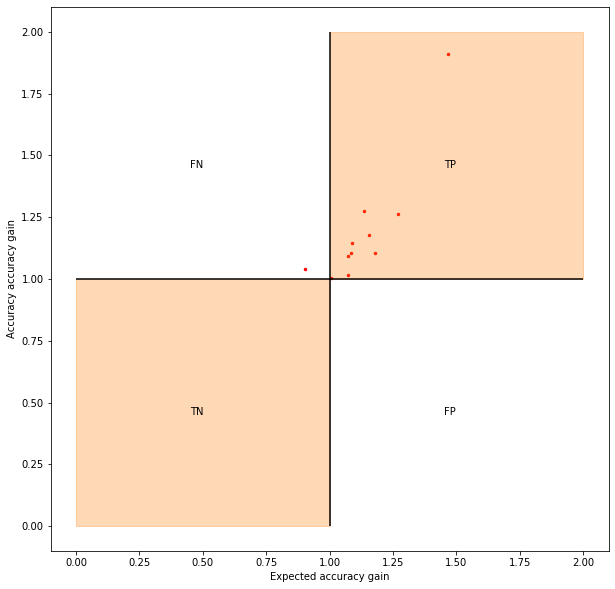

In [47]:
plt.figure(figsize = [10,10])

plt.hlines(1, 0, 2,)
plt.vlines(1, 0, 2,)
plt.xlabel('Expected accuracy gain')
plt.ylabel('Accuracy accuracy gain')
plt.scatter(Expected_gain, Actual_Gain, c='red', s=6)

plt.fill_between(x=[0,1], y1=[1,1], y2=0,color='C1',alpha=0.3,)
plt.fill_between(x=[1,2], y1=[2,2], y2=[1,1],color='C1',alpha=0.3,)

plt.text(0.45,0.45,'TN')
plt.text(0.45,1.45,'FN')
plt.text(1.45,1.45,'TP')
plt.text(1.45,0.45,'FP')